This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.1534 - accuracy: 0.9524
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0309 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0184 - accuracy: 0.9946


**Evaluating the convnet**

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0316 - accuracy: 0.9899
Test accuracy: 0.990


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [5]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

**Copying images to training, validation, and test directories**

In [7]:
import pathlib

new_base_dir = pathlib.Path("../data/cats_vs_dogs_small")

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
# 将图像输入的取值范围缩放到[0,1]区间
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [10]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

# image_dataset_from_directory快速建立数据通道，自动将磁盘上的图像文件转换为预处理好的张量批量
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [12]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [13]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [14]:
# batch()方法批量生成数据
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [15]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [16]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [17]:
# 保存文件始终包含最佳训练轮次的模型状态
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 5s 54ms/step - loss: 0.7515 - accuracy: 0.5115 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 3s 43ms/step - loss: 0.7052 - accuracy: 0.5290 - val_loss: 0.6768 - val_accuracy: 0.5940
Epoch 3/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6874 - accuracy: 0.5970 - val_loss: 0.6726 - val_accuracy: 0.5660
Epoch 4/30
63/63 [==============================] - 3s 43ms/step - loss: 0.6300 - accuracy: 0.6570 - val_loss: 0.5957 - val_accuracy: 0.6630
Epoch 5/30
63/63 [==============================] - 3s 42ms/step - loss: 0.5825 - accuracy: 0.7110 - val_loss: 0.6836 - val_accuracy: 0.6470
Epoch 6/30
63/63 [==============================] - 3s 45ms/step - loss: 0.5352 - accuracy: 0.7335 - val_loss: 0.5576 - val_accuracy: 0.7180
Epoch 7/30
63/63 [==============================] - 3s 46ms/step - loss: 0.5022 - accuracy: 0.7560 - val_loss: 0.5326 - val_accuracy: 0.7460
Epoch 8/30
63

**Displaying curves of loss and accuracy during training**

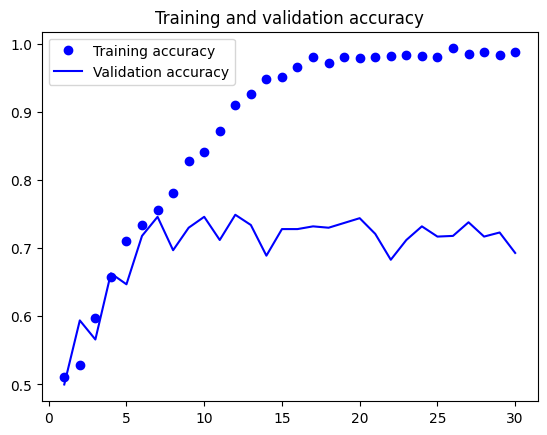

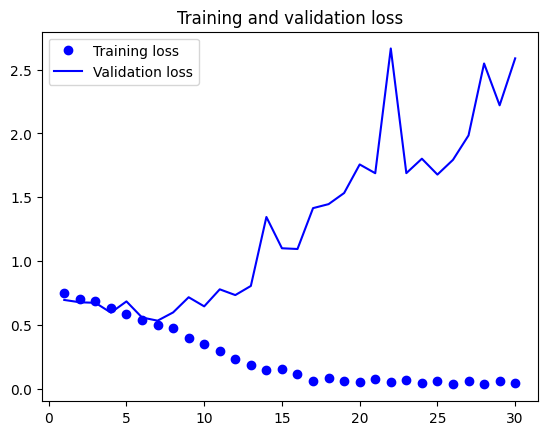

In [18]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [19]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 16ms/step - loss: 0.5621 - accuracy: 0.7170
Test accuracy: 0.717


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [20]:
data_augmentation = keras.Sequential(
    [
        # 水平翻转应用于随机抽取的50%图像
        layers.RandomFlip("horizontal"),
        # 将输入图像在[-10%,+10%]的范围随机旋转
        layers.RandomRotation(0.1),
        # 放大或缩小图像，缩放比例在[-20%,+20%]范围内随机取值
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

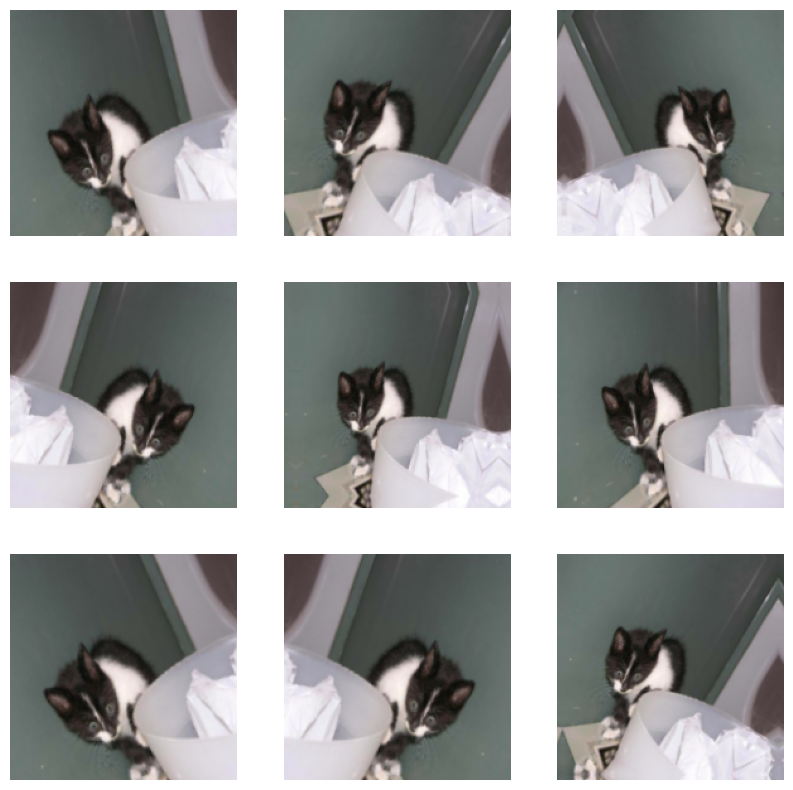

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [22]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

模型训练时长需要至少28分钟。

In [23]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 19s 256ms/step - loss: 0.7214 - accuracy: 0.5105 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 16s 249ms/step - loss: 0.6904 - accuracy: 0.5420 - val_loss: 2.5884 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 16s 254ms/step - loss: 0.7088 - accuracy: 0.5975 - val_loss: 0.6326 - val_accuracy: 0.6410
Epoch 4/100
63/63 [==============================] - 16s 257ms/step - loss: 0.6477 - accuracy: 0.6165 - val_loss: 0.8533 - val_accuracy: 0.5820
Epoch 5/100
63/63 [==============================] - 16s 254ms/step - loss: 0.6414 - accuracy: 0.6570 - val_loss: 0.6462 - val_accuracy: 0.6090
Epoch 6/100
63/63 [==============================] - 16s 254ms/step - loss: 0.6192 - accuracy: 0.6610 - val_loss: 0.6434 - val_accuracy: 0.6240
Epoch 7/100
63/63 [==============================] - 16s 259ms/step - loss: 0.5961 - accuracy: 0.6820 - val_loss: 0.6033 - val_accuracy:

Epoch 41/100
63/63 [==============================] - 16s 250ms/step - loss: 0.2230 - accuracy: 0.9055 - val_loss: 0.7361 - val_accuracy: 0.7780
Epoch 42/100
63/63 [==============================] - 16s 250ms/step - loss: 0.2142 - accuracy: 0.9080 - val_loss: 0.5920 - val_accuracy: 0.8040
Epoch 43/100
63/63 [==============================] - 16s 250ms/step - loss: 0.2320 - accuracy: 0.9105 - val_loss: 0.6977 - val_accuracy: 0.7810
Epoch 44/100
63/63 [==============================] - 16s 251ms/step - loss: 0.2432 - accuracy: 0.9065 - val_loss: 0.6229 - val_accuracy: 0.7910
Epoch 45/100
63/63 [==============================] - 16s 251ms/step - loss: 0.2034 - accuracy: 0.9190 - val_loss: 0.6164 - val_accuracy: 0.8040
Epoch 46/100
63/63 [==============================] - 16s 252ms/step - loss: 0.2317 - accuracy: 0.9075 - val_loss: 0.5655 - val_accuracy: 0.7990
Epoch 47/100
63/63 [==============================] - 16s 250ms/step - loss: 0.2157 - accuracy: 0.9200 - val_loss: 0.6470 - val_ac

63/63 [==============================] - 16s 251ms/step - loss: 0.1236 - accuracy: 0.9600 - val_loss: 1.1755 - val_accuracy: 0.7880
Epoch 98/100
63/63 [==============================] - 16s 253ms/step - loss: 0.1286 - accuracy: 0.9560 - val_loss: 2.3274 - val_accuracy: 0.7400
Epoch 99/100
63/63 [==============================] - 16s 250ms/step - loss: 0.1284 - accuracy: 0.9590 - val_loss: 0.9772 - val_accuracy: 0.8300
Epoch 100/100
63/63 [==============================] - 16s 251ms/step - loss: 0.1544 - accuracy: 0.9585 - val_loss: 0.9283 - val_accuracy: 0.7910


**Evaluating the model on the test set**

In [24]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 15ms/step - loss: 0.5434 - accuracy: 0.7450
Test accuracy: 0.745


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [25]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [27]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 18ms/step


In [28]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [29]:
inputs = keras.Input(shape=(5, 5, 512))
# 将特征传入Dense层之前，经过Flatten层
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 12.7603 - accuracy: 0.9235 - val_loss: 3.0553 - val_accuracy: 0.9750
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.7739 - accuracy: 0.9805 - val_loss: 4.0194 - val_accuracy: 0.9770
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.9687 - accuracy: 0.9825 - val_loss: 5.8899 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2894 - accuracy: 0.9900 - val_loss: 7.3248 - val_accuracy: 0.9660
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0055 - accuracy: 0.9945 - val_loss: 5.2993 - val_accuracy: 0.9680
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8228 - accuracy: 0.9920 - val_loss: 7.2195 - val_accuracy: 0.9690
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6959 - accuracy: 0.9940 - val_loss: 4.2852 - val_accuracy: 0.9750
Epoch 8/20
63/63 [=

**Plotting the results**

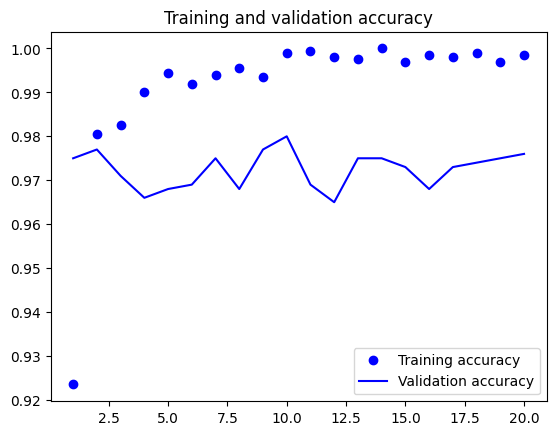

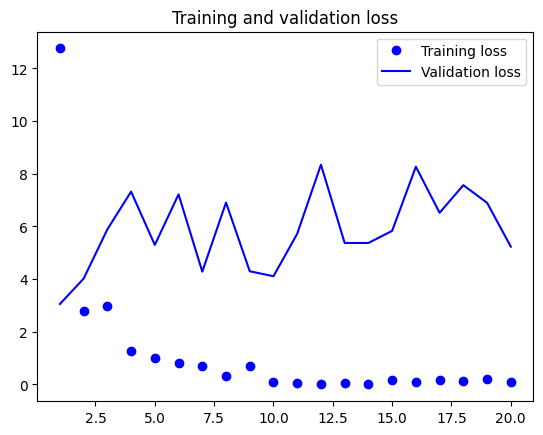

In [30]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [31]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
# 将卷积基冻结，清空该层或模型的可训练权重列表
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [32]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [33]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [34]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
# 使用数据增强
x = data_augmentation(inputs)
# 对输入值进行缩放
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
# 设置50轮
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 20s 284ms/step - loss: 20.3764 - accuracy: 0.8985 - val_loss: 2.7660 - val_accuracy: 0.9770
Epoch 2/50
63/63 [==============================] - 18s 280ms/step - loss: 8.0234 - accuracy: 0.9425 - val_loss: 5.3362 - val_accuracy: 0.9730
Epoch 3/50
63/63 [==============================] - 18s 280ms/step - loss: 4.8953 - accuracy: 0.9615 - val_loss: 3.7518 - val_accuracy: 0.9730
Epoch 4/50
63/63 [==============================] - 18s 280ms/step - loss: 4.1973 - accuracy: 0.9655 - val_loss: 6.5048 - val_accuracy: 0.9690
Epoch 5/50
63/63 [==============================] - 18s 281ms/step - loss: 2.8943 - accuracy: 0.9740 - val_loss: 3.5002 - val_accuracy: 0.9790
Epoch 6/50
63/63 [==============================] - 18s 281ms/step - loss: 3.1016 - accuracy: 0.9770 - val_loss: 3.8028 - val_accuracy: 0.9750
Epoch 7/50
63/63 [==============================] - 18s 281ms/step - loss: 3.0171 - accuracy: 0.9730 - val_loss: 4.3424 - val_accuracy: 0.976

63/63 [==============================] - 18s 282ms/step - loss: 0.5899 - accuracy: 0.9935 - val_loss: 3.2877 - val_accuracy: 0.9790
Epoch 42/50
63/63 [==============================] - 18s 282ms/step - loss: 0.3917 - accuracy: 0.9935 - val_loss: 3.7081 - val_accuracy: 0.9780
Epoch 43/50
63/63 [==============================] - 18s 285ms/step - loss: 0.5070 - accuracy: 0.9925 - val_loss: 3.7124 - val_accuracy: 0.9760
Epoch 44/50
63/63 [==============================] - 18s 283ms/step - loss: 0.6602 - accuracy: 0.9915 - val_loss: 4.0291 - val_accuracy: 0.9770
Epoch 45/50
63/63 [==============================] - 18s 284ms/step - loss: 0.1392 - accuracy: 0.9970 - val_loss: 3.8243 - val_accuracy: 0.9750
Epoch 46/50
63/63 [==============================] - 18s 283ms/step - loss: 0.5088 - accuracy: 0.9925 - val_loss: 4.9491 - val_accuracy: 0.9730
Epoch 47/50
63/63 [==============================] - 18s 282ms/step - loss: 0.6197 - accuracy: 0.9945 - val_loss: 4.0890 - val_accuracy: 0.9750
Epoc

**Evaluating the model on the test set**

In [36]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 58ms/step - loss: 3.9058 - accuracy: 0.9780
Test accuracy: 0.978


### Fine-tuning a pretrained model

In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [38]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [39]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 21s 298ms/step - loss: 0.3389 - accuracy: 0.9955 - val_loss: 4.4784 - val_accuracy: 0.9700
Epoch 2/30
63/63 [==============================] - 18s 293ms/step - loss: 0.5819 - accuracy: 0.9930 - val_loss: 3.2137 - val_accuracy: 0.9790
Epoch 3/30
63/63 [==============================] - 18s 293ms/step - loss: 0.3969 - accuracy: 0.9945 - val_loss: 2.8953 - val_accuracy: 0.9790
Epoch 4/30
63/63 [==============================] - 18s 291ms/step - loss: 0.2792 - accuracy: 0.9950 - val_loss: 2.9188 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 18s 290ms/step - loss: 0.5479 - accuracy: 0.9950 - val_loss: 3.0720 - val_accuracy: 0.9790
Epoch 6/30
63/63 [==============================] - 18s 291ms/step - loss: 0.5084 - accuracy: 0.9910 - val_loss: 3.0763 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 18s 291ms/step - loss: 0.1677 - accuracy: 0.9950 - val_loss: 3.4288 - val_accuracy: 0.9780

In [40]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 58ms/step - loss: 3.6957 - accuracy: 0.9800
Test accuracy: 0.980


## Summary